


# K-Means Clustering





## Introduction

There are many models for **clustering** out there. In this notebook, we will be presenting the model that is considered one of the simplest models amongst them. Despite its simplicity, the **K-means** is vastly used for clustering in many data science applications, it is especially useful if you need to quickly discover insights from **unlabeled data**. In this notebook, you will learn how to use k-Means for customer segmentation.

Some real-world applications of k-means:
- Customer segmentation
- Understand what the visitors of a website are trying to accomplish
- Pattern recognition
- Machine learning
- Data compression


In this notebook we practice k-means clustering with 2 examples:
- k-means on a random generated dataset
- Using k-means for customer segmentation


In [1]:
import random
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline


<h1 id="random_generated_dataset">k-Means on a randomly generated dataset</h1>

Let's create our own dataset for this lab!


First we need to set a random seed. Use numpy's random.seed() function, where the seed will be set to 0.

In [2]:
np.random.seed(0)

Next we will be making <i> random clusters </i> of points by using the <b> make_blobs </b> class. The <b> make_blobs </b> class can take in many inputs, but we will be using these specific ones. <br> <br>
<b> <u> Input </u> </b>
<ul>
    <li> <b>n_samples</b>: The total number of points equally divided among clusters. </li>
    <ul> <li> Value will be: 5000 </li> </ul>
    <li> <b>centers</b>: The number of centers to generate, or the fixed center locations. </li>
    <ul> <li> Value will be: [[4, 4], [-2, -1], [2, -3],[1,1]] </li> </ul>
    <li> <b>cluster_std</b>: The standard deviation of the clusters. </li>
    <ul> <li> Value will be: 0.9 </li> </ul>
</ul>
<br>
<b> <u> Output </u> </b>
<ul>
    <li> <b>X</b>: Array of shape [n_samples, n_features]. (Feature Matrix)</li>
    <ul> <li> The generated samples. </li> </ul> 
    <li> <b>y</b>: Array of shape [n_samples]. (Response Vector)</li>
    <ul> <li> The integer labels for cluster membership of each sample. </li> </ul>
</ul>


In [3]:
x , y = make_blobs(n_samples=5000, centers= [[4,4], [-2, -1], [2, -3], [1, 1]] , cluster_std=0.9) #One cluster will be centered at (4, 4),


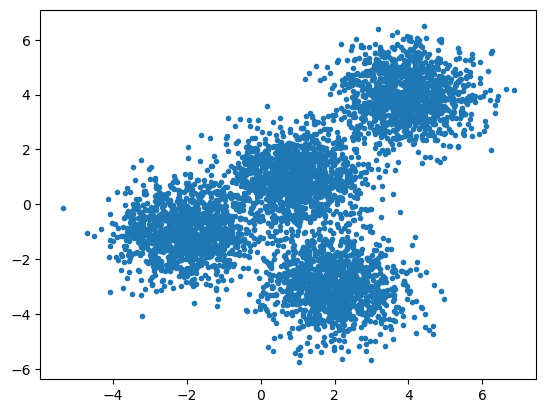

In [4]:
# Display the scatter plot of the randomly generated data.
plt.scatter(x[:,0],x[:,1],marker='.') # first column (x[:, 0])  x-axis, and  second column (x[:, 1])  y-axis., marker='.':  marker style
plt.show()

<h2 id="setting_up_K_means">Setting up K-Means</h2>
Now that we have our random data, let's set up our K-Means Clustering.


The KMeans class has many parameters that can be used, but we will be using these three:
<ul>
    <li> <b>init</b>: Initialization method of the centroids. </li>
    <ul>
        <li> Value will be: "k-means++" </li>
        <li> k-means++: Selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.</li>
    </ul>
    <li> <b>n_clusters</b>: The number of clusters to form as well as the number of centroids to generate. </li>
    <ul> <li> Value will be: 4 (since we have 4 centers) 4 natural groupings (e.g., 4 customer segments or 4 regions of points),</li> </ul> 
    <li> <b>n_init</b>: Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia. </li>
    <ul> <li> Value will be: 12 </li> </ul>
</ul>

Initialize KMeans with these parameters, where the output parameter is called <b>k_means</b>.


In [5]:
kmeans = KMeans(init="k-means++" , n_clusters= 4 , n_init=12)

In [6]:
# Now let's fit the KMeans model with the feature matrix we created above, X .
kmeans.fit(x)

c:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


KMeans(n_clusters=4, n_init=12)

In [7]:
# Now let's grab the labels for each point in the model using KMeans' .labels_ attribute and save it as k_means_labels 
k_means_labels = kmeans.labels_
k_means_labels

array([0, 3, 3, ..., 1, 0, 0])

In [8]:
# We will also get the coordinates of the cluster centers using KMeans' .cluster_centers_ and save it as k_means_cluster_centers .
k_means_cluster_centers = kmeans.cluster_centers_
k_means_cluster_centers

array([[-2.03743147, -0.99782524],
       [ 3.97334234,  3.98758687],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822]])

<h2 id="creating_visual_plot">Creating the Visual Plot</h2>

So now that we have the random data generated and the KMeans model initialized, let's plot them and see what it looks like!


#### plt.cm.Spectral
plt.cm: This refers to the colormap module in Matplotlib, which provides a range of predefined color maps.

Spectral: One specific colormap in Matplotlib that is widely used for clustering or segmentation visualizations. 
(from blue to red, via yellow and green).

#### np.linspace(0, 1, len(set(k_means_labels)))
#### np.linspace(start, stop, num):
Creates an array of num evenly spaced values between start and stop.
Here, start=0 and stop=1 ensure the values span the full range of the colormap.

#### len(set(k_means_labels)):
k_means_labels contains the cluster labels for each data point.
set(k_means_labels) gives the unique cluster labels (e.g., {0, 1, 2, 3} if there are 4 clusters).
len(set(k_means_labels)) counts the number of unique clusters (k).


#### ax = fig.add_subplot(nrows, ncols, index) - ax = fig.add_subplot(1,1,1)
fig: Refers to the figure object created earlier, typically with plt.figure().

nrows: Number of rows in the subplot grid.

ncols: Number of columns in the subplot grid.

index: Specifies the position of the subplot in the grid, counting left-to-right, top-to-bottom.

Returns: An Axes object that you can use to plot on the specific subplot.

#### k is the index of the cluster.
col is the color associated with that cluster (likely from a predefined list colors).

The loop iterates over the range of clusters (the number of clusters in [[4,4], [-2, -1], [2, -3], [1, 1]]) and associates each cluster with a specific color.

#### my_members = (k_means_labels == k)
k_means_labels is a vector (usually an array) indicating the cluster labels for each data point.
my_members is a boolean array where True means that the data point belongs to the current cluster (k), and False means it does not.

#### cluster_center = k_means_cluster_centers[k]
k_means_cluster_centers holds the coordinates of the centroids (the center of each cluster).
cluster_center stores the coordinates of the centroid of the current cluster k.


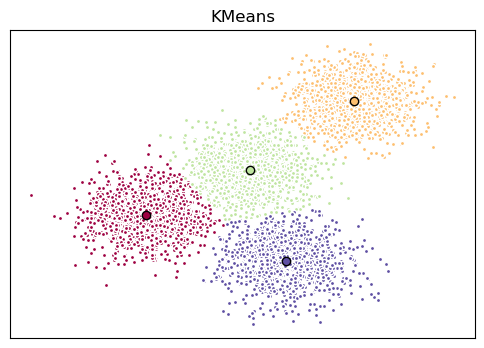

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Initialize the figure with the specified dimensions
fig, ax = plt.subplots(figsize=(6, 4))

# Assuming k_means_labels, k_means_cluster_centers, and X are defined properly
color = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Loop through each cluster and plot the points and centroids
for k, col in zip(range(len(k_means_cluster_centers)), color):
    my_members = (k_means_labels == k)  # Identify the data points in the current cluster
    cluster_center = k_means_cluster_centers[k]  # Get the centroid of the current cluster
    
    # Plot the data points in the current cluster
    ax.plot(x[my_members, 0], x[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plot the centroid of the cluster
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)

# Set the title of the plot
ax.set_title('KMeans')

# Remove x-axis and y-axis ticks
ax.set_xticks(())
ax.set_yticks(())

# Display the plot
plt.show()


### Load Data From CSV File  
Before you can work with the data, let's use pandas to read the dataset from IBM Object Storage.


In [10]:
import pandas as pd
cust_df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/Cust_Segmentation.csv")
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [11]:
df = cust_df.drop('Address', axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


#### Normalizing over the standard deviation
Now let's normalize the dataset. But why do we need normalization in the first place? Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally. We use __StandardScaler()__ to normalize our dataset.


In [12]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:] # Selects all rows and all columns starting from the second column onward , ([:, 1]: Would select all rows, but only the second column)
X = np.nan_to_num(X) # converts any NaN (Not a Number) values in the array X to numerical values
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

## Modeling
In our example (if we didn't have access to the k-means algorithm), it would be the same as guessing that each customer group would have certain age, income, education, etc, with multiple tests and experiments. However, using the K-means clustering we can do all this process much easier.

Let's apply k-means on our dataset, and take a look at cluster labels.


In [13]:
clusterNum = 3  # The number of clusters you want to create
k_means = KMeans(init="k-means++", n_clusters=clusterNum, n_init=12)  # Initialize the KMeans model
k_means.fit(X)  # Fit the model to the data
labels = k_means.labels_  # Retrieve the cluster labels for each data point
print(labels)  # Print the cluster labels


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[2 0 2 2 1 0 2 0 2 0 0 2 2 2 2 2 2 2 0 2 2 2 2 0 0 0 2 2 0 2 0 2 2 2 2 2 2
 2 2 0 2 0 2 1 2 0 2 2 2 0 0 2 2 0 0 2 2 2 0 2 0 2 0 0 2 2 0 2 2 2 0 0 0 2
 2 2 2 2 0 2 0 0 1 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 2 2 2 2 0 2 0 2
 2 2 2 2 2 2 0 2 0 0 2 0 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 2 2 2 0 2
 2 2 2 2 0 2 2 0 2 0 2 2 0 1 2 0 2 2 2 2 2 2 1 0 2 2 2 2 0 2 2 0 0 2 0 2 0
 2 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 1 0 2 2 2 2 2 2 2 0 2 2 2 2
 2 2 0 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 0 2 0 2 0 0 2 2 2 2 2 2
 2 2 2 0 0 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 0 2 0 0 2
 2 2 2 2 0 2 2 2 2 2 2 0 2 2 0 2 2 0 2 2 2 2 2 0 2 2 2 1 2 2 2 0 2 0 0 0 2
 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2
 2 0 2 2 0 2 2 2 2 0 2 2 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2 2 1
 2 2 2 2 2 2 0 2 2 2 1 2 2 2 2 0 2 1 2 2 2 2 0 2 0 0 0 2 2 0 0 2 2 2 2 2 2
 2 0 2 2 2 2 0 2 2 2 0 2 

<h2 id="insights">Insights</h2>

We assign the labels to each row in the dataframe.


In [14]:
df["Clus_km"] = labels
df.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,2
1,2,47,1,26,100,4.582,8.218,0.0,12.8,0
2,3,33,2,10,57,6.111,5.802,1.0,20.9,2
3,4,29,2,4,19,0.681,0.516,0.0,6.3,2
4,5,47,1,31,253,9.308,8.908,0.0,7.2,1


In [15]:
# We can easily check the centroid values by averaging the features in each cluster.
df.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,402.295082,41.333333,1.956284,15.256831,83.928962,3.103639,5.765279,0.171233,10.724590
1,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222
2,432.468413,32.964561,1.614792,6.374422,31.164869,1.032541,2.104133,0.285185,10.094761


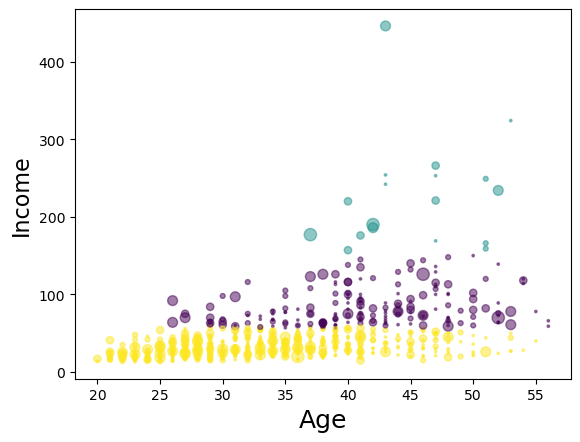

In [16]:
# Now, let's look at the distribution of customers based on their age and income:
area = np.pi * (X[:, 1])**2  # Calculate the area for each point (using the second feature in X)
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(float), alpha=0.5)  # Scatter plot
plt.xlabel('Age', fontsize=18)  # Set the x-axis label
plt.ylabel('Income', fontsize=16)  # Set the y-axis label

plt.show()  # Display the plot


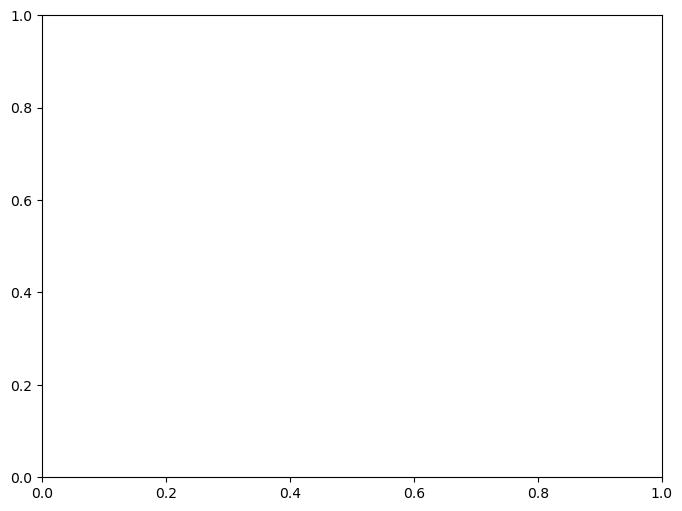

In [18]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(float))

plt.show()


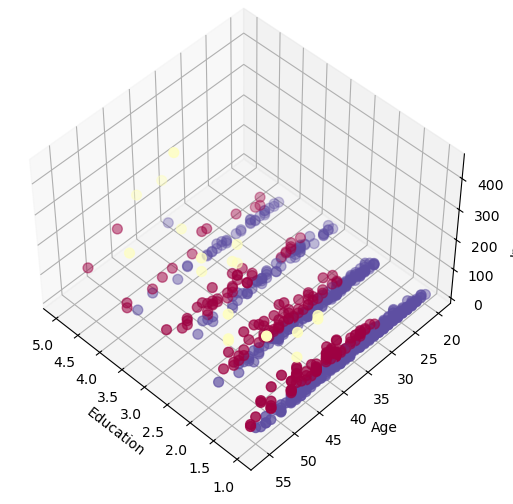

In [64]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# Example Data
# X = np.random.rand(100, 4)  # Replace this with your actual data
# labels = np.random.randint(0, 3, 100)  # Replace with your actual labels

# Create a figure and a 3D axis
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d', elev=48, azim=134)  # 3D subplot with elevation and azimuth

# Set axis labels
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

# Scatter plot with color representing labels
ax.scatter(X[:, 1], X[:, 0], X[:, 3], c=labels.astype(float), cmap=plt.cm.Spectral, s=50)

# Display the plot
plt.show()
